# Data Science Assignment 2 

By: Lim Yu Jin

# Introduction

In this assignment, I am going to conduct predictive analytics, through machine learning. Also, Conduct binary classification using Random Forest and Decision Tree and linear regression for prediction.

# Question 1

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
loan = pd.read_csv('loan_data.csv')

In [63]:
#showing the loan_data file
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

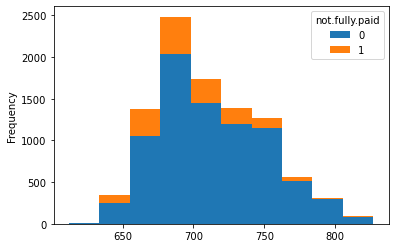

In [64]:
#plotting a stacked histogram of the borrowers which have fully paid and not fully paid
loan.pivot(columns='not.fully.paid').fico.plot(kind = 'hist', stacked=True, bins = 10)

<AxesSubplot:xlabel='fico', ylabel='int.rate'>

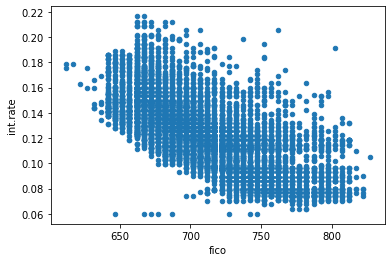

In [31]:
loan.plot.scatter(x = 'fico', y = 'int.rate')

From the diagram above, we can see that the higher the credit score of the borrower, the lower assigned interest rate. 

Supervised machine learning is used by humans to teach the machine to learn the information by giving it the correct answer. For example, to let a machine how to differentiate dog and cat humans need to provide them several pictures of dog and cat and tell them the answers. By doing this, the machine will be able to detect the characteristics of them and can differentiate by themselves.

By using the example above, labelled data means that the answers are provided. Such as, we provide the picture of a dog to the machine and tell it that this is a dog.

Training datasets are the data that be used to train the machine which is let the machine to learn. Testing datasets are use to check how good the machine learns, which is like a exam to the machine after they have learned. The testing datasets can give uus the precision, accuracy, Negative Predictive value, specificity and sensitivity of the machine.

In [66]:
#extract the data needed and create a new dataframe to visualise it.
#The data used is the credit scoreof the borrower(fico), the assigned interest rate(int.rae) and the mraking of who is not fully paid(not.fully.paid)
tnt = loan[['fico','int.rate','not.fully.paid']]
tnt

,fico,int.rate,not.fully.paid
0,737,0.1189,0
1,707,0.1071,0
2,682,0.1357,0
3,712,0.1008,0
4,667,0.1426,0
...,...,...,...
9573,672,0.1461,1
9574,722,0.1253,1
9575,687,0.1071,1
9576,692,0.1600,1


In [69]:
"""
Separate the dataframe, the first two columns (fico,int.rate) are used to train the model,
last column (not.fully.paid) is to give the machine the answer.
"""
X = tnt.iloc[:, [0, 1]].values  
y = tnt.iloc[:, 2].values       

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
#split the data for training (80 %) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 0
)

Binary classification is to classified the datasets into 2 classes,which is like a prediction about which of two groups the data belongs to.

Multi-class classification is to classifying data into different classes, unlike the binary it doesn’t limit the number of classes.

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
#create a decision tree for training
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [75]:
X_train, y_train
X_test, y_test

(array([[-0.63489632, -0.13322427],
        [-0.1073566 , -0.01384841],
        [-1.03055111,  1.75440663],
        ...,
        [-0.89866618,  0.69494581],
        [-0.50301139,  0.59795291],
        [ 1.07960776, -0.78606105]]),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

In [77]:
#Let the model to predict the answer
y_pred = classifier.predict(X_test)

In [78]:
#Form a confusion metrics to check its efficiency
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   92],
       [ 279,   22]], dtype=int64)

In [79]:
#Let us see the accurcy of this decision tree
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8063674321503131

In [80]:
#Create a random forest for training
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(
    n_estimators = 2000,
    criterion = 'entropy',
    random_state = 0
)
rfclassifier.fit(X_train, y_train)

y1_pred = rfclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y1_pred)
cm1

array([[1530,   85],
       [ 282,   19]], dtype=int64)

In [81]:
#Let us see the accuracy of this random forest
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y1_pred)

0.808455114822547

# Conclusion

By comparing the accuracy of decision tree and random forest, I found out that the accuracy of random forest is higher than the accuracy of decision tree. So, the random forest is performing better in this model.

# Question 2

In [83]:
cus = pd.read_csv('Customers-shop.csv')

In [84]:
#Showing the Customer-shop file
cus.head()

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<AxesSubplot:xlabel='Time on Website', ylabel='Yearly Amount Spent'>

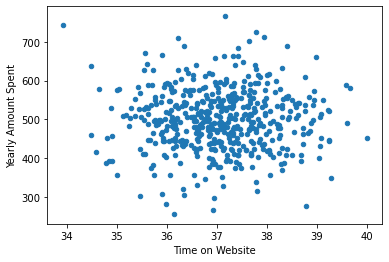

In [86]:
#Visualise the relationship between the time on website and the yearly amount time spent
cus.plot.scatter(x = 'Time on Website', y = 'Yearly Amount Spent')

<AxesSubplot:xlabel='Time on App', ylabel='Yearly Amount Spent'>

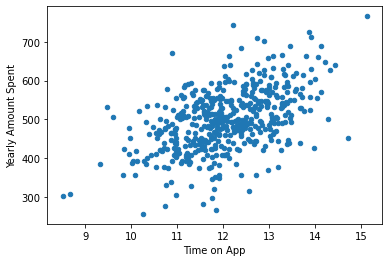

In [87]:
cus.plot.scatter(x = 'Time on App', y = 'Yearly Amount Spent')

In [88]:
#Visualise the relationship between the time on App and the yearly amount time spent
YAS = cus[['Time on App','Time on Website','Yearly Amount Spent']]
YAS

,Time on App,Time on Website,Yearly Amount Spent
0,12.655651,39.577668,587.951054
1,11.109461,37.268959,392.204933
2,11.330278,37.110597,487.547505
3,13.717514,36.721283,581.852344
4,12.795189,37.536653,599.406092
...,...,...,...
495,13.566160,36.417985,573.847438
496,11.695736,37.190268,529.049004
497,11.499409,38.332576,551.620146
498,12.391423,36.840086,456.469510


Let us see is the time on App or time on website is more effecting the yearly amount of time spent

In [89]:
#Let us see what can we get for using the data of time on App
p = YAS.iloc[:, [0]].values  
Q = YAS.iloc[:, 2].values      

In [90]:
#split the data for training (70%) and testing (30%)
p_train, p_test, Q_train, Q_test = train_test_split(
    p, Q, test_size = 0.30, random_state = 0
)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
#Create a linear regression model
model = LinearRegression().fit(p_train,Q_train)

In [103]:
#Let us see the coefficient of the model
model.coef_

array([39.1629381])

In [104]:
#Let the model to predict the outcome
Q_pred = model.predict(p_test)

In [105]:
#Let us see the mean absolute error and root mean square error of the model
from sklearn import metrics
print(metrics.mean_absolute_error(Q_test, Q_pred))
print(np.sqrt(metrics.mean_squared_error(Q_test, Q_pred)))

53.464035410445696
68.14403128509161


In [106]:
#Let us see what can we get for using the data of time on Website
R = YAS.iloc[:, [1]].values  

In [107]:
#split the data for training (70%) and testing (30%)
R_train, R_test, Q_train, Q_test = train_test_split(
    R, Q, test_size = 0.30, random_state = 0
)

In [108]:
#Create a linear regression model
model_1 = LinearRegression().fit(R_train,Q_train)

In [109]:
#Let us see the coefficient of the model
model_1.coef_

array([-1.58457927])

In [99]:
#Let the model to predict the outcome
Q1_pred = model_1.predict(R_test)

In [110]:
#Let us see the mean absolute error and root mean square error of the model
print(metrics.mean_absolute_error(R_test, Q_pred))
print(np.sqrt(metrics.mean_squared_error(R_test, Q_pred)))

462.76981177397886
464.3865220092043


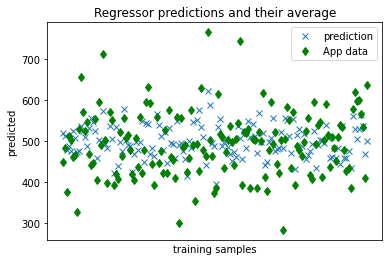

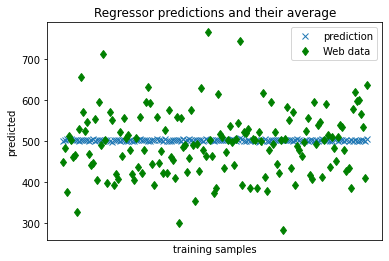

In [111]:
"""
Let us scatter the predict outcome vs the truth outcome. 
Visualise the relation of time on App and total amount of time spent and
relation of time on Website an total amount of time spent.
See which is more affecting the total amount of time spent.
"""
plt.figure()
plt.plot(Q_pred, 'x', label='prediction')
plt.plot(Q_test,'gd',label = 'App data')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

plt.figure()
plt.plot(Q1_pred, 'x', label='prediction')
plt.plot(Q_test,'gd',label = 'Web data')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

# Conclusion

In this case, we saw can saw that the Time on App is more important for increasing the yearly-amount-spent.So, it is better for the company to focus their efforts on their mobile app.